Load the previously saved csv files

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

Import topographic mapping shp file 

In [3]:
shapefile = gpd.read_file("topgraphic-mapping-poles-wgs84/TOPO_POLES_WGS84.shp")

In [4]:
shapefile.head()

,objectid,subtype,subtypecod,elevation,d_owner,last_attri,last_geom_,geometry
0,154490,Miscellaneous Pole,6006,85.43,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35169 43.69973)
1,154491,Miscellaneous Pole,6006,84.67,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35657 43.69672)
2,154492,Miscellaneous Pole,6006,84.52,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35651 43.69669)
3,154493,Miscellaneous Pole,6006,85.28,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35629 43.69699)
4,154494,Miscellaneous Pole,6006,85.13,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35614 43.69725)


Convert the shp file to GeoDataFrame:

In [60]:
topo_gdf = gpd.GeoDataFrame(data = shapefile, geometry = shapefile.geometry)
topo_gdf.head()

,objectid,subtype,subtypecod,elevation,d_owner,last_attri,last_geom_,geometry
0,154490,Miscellaneous Pole,6006,85.43,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35169 43.69973)
1,154491,Miscellaneous Pole,6006,84.67,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35657 43.69672)
2,154492,Miscellaneous Pole,6006,84.52,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35651 43.69669)
3,154493,Miscellaneous Pole,6006,85.28,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35629 43.69699)
4,154494,Miscellaneous Pole,6006,85.13,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35614 43.69725)


Load `neighbourhoods` shp file.

In [67]:
neighbourhoods = gpd.read_file('toronto_neighbourhoods.shp')
neighbourhoods.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry
0,2101,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,2102,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,2103,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,2104,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,2105,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


In [68]:
# Write your code here.
#select columns needed and rename field 8 to name
neighbourhoods = neighbourhoods[['geometry', 'FIELD_8']].rename(columns = {'FIELD_8':'name'})

# View GeoDataFrame
neighbourhoods.head()

,geometry,name
0,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",Wychwood (94)
1,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",Yonge-Eglinton (100)
2,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",Yonge-St.Clair (97)
3,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",York University Heights (27)
4,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",Yorkdale-Glen Park (31)


Check the crs of both `neighbourhoods` and `topo_gdf` GeoDataFrames.

In [7]:
neighbourhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
topo_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

`topo_gdf` contains different kinds of lights:

In [45]:
topo_gdf['subtype'].unique()

array(['Miscellaneous Pole', 'Street Light and Traffic Signal Pole',
       'Traffic Signal Pole', 'Street Light Pole',
       'Pedestrian Light Pole', 'Circular Hydro Tower'], dtype=object)

`Street Light and Traffic Signal Pole` contains both `Traffic Signal Pole` and `Street Light Pole`. Select only `Street Light and Traffic Signal Pole`:

In [73]:
topo_gdf_st_light_pole = topo_gdf.loc[topo_gdf['subtype'] == 'Street Light Pole']

In [74]:
topo_gdf_st_light_pole.head()

,objectid,subtype,subtypecod,elevation,d_owner,last_attri,last_geom_,geometry
28,154518,Street Light Pole,6003,122.40,None,2014/01/01 00:00:00.000,2014/01/01 00:00:00.000,POINT (-79.39502 43.68007)
29,154519,Street Light Pole,6003,122.91,None,2014/01/01 00:00:00.000,2014/01/01 00:00:00.000,POINT (-79.39625 43.67983)
30,154520,Street Light Pole,6003,125.26,None,2014/01/01 00:00:00.000,2014/01/01 00:00:00.000,POINT (-79.39680 43.68103)
31,154521,Street Light Pole,6003,125.13,None,2014/01/01 00:00:00.000,2014/01/01 00:00:00.000,POINT (-79.39648 43.68110)
32,154522,Street Light Pole,6003,125.36,None,2014/01/01 00:00:00.000,2014/01/01 00:00:00.000,POINT (-79.39610 43.68117)


In [69]:
traffic_signal = topo_gdf.loc[topo_gdf['subtype'] == 'Traffic Signal Pole']
# ax = neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
# traffic_signal.geometry.plot(ax=ax, color='orange', markersize = 1, edgecolor='k', label='traffic signal')
# plt.xlabel('East, meters', fontsize=18)
# plt.ylabel('North, meters', fontsize=18)
# plt.legend()

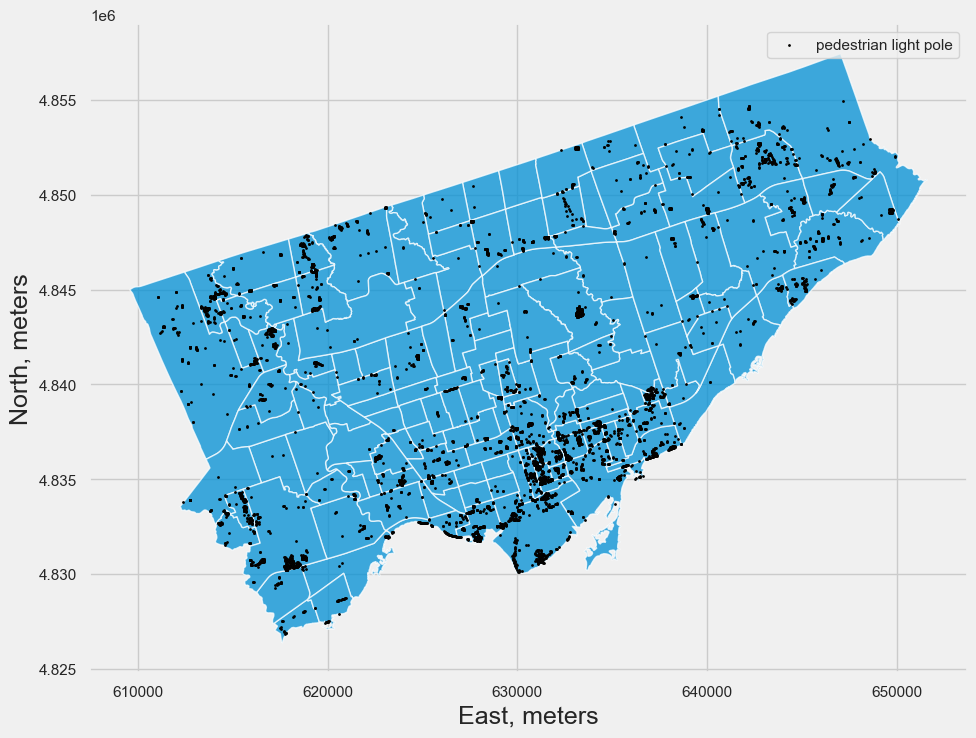

In [29]:
# ped_light = topo_gdf.loc[topo_gdf['subtype'] == 'Pedestrian Light Pole']
# ax = neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
# ped_light.geometry.plot(ax=ax, color='orange', markersize = 1, edgecolor='k', label='pedestrian light pole')
# plt.xlabel('East, meters', fontsize=18)
# plt.ylabel('North, meters', fontsize=18)
# plt.legend()

Load the cyclist collision data and remove all the collision accidents prior to 2018.

In [11]:
collision_shp = gpd.read_file("Cyclists.shp")

In [13]:
collision_gdf = gpd.GeoDataFrame(data = collision_shp, geometry = collision_shp.geometry)
collision_gdf = collision_gdf.loc[collision_gdf['YEAR'] >=2018]
collision_gdf.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURH,HOOD_140,NEIGHBOU_1,DIVISION,ObjectId,geometry
1001,80923405,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,None,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1002,POINT (-8844666.500 5433115.618)
1002,80923406,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,None,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1003,POINT (-8844666.500 5433115.618)
1003,80937623,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,None,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1004,POINT (-8834934.394 5419362.224)
1004,80937624,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,None,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1005,POINT (-8834934.394 5419362.224)
1005,80926724,None,2018,2018-02-03,1525,8 HERTFORD AVE,None,30 m North of,Local,Etobicoke York,...,None,None,None,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,1006,POINT (-8847375.794 5417393.496)


1. Number of collision accidents with respect to `LIGHT`, `VISIBILITY` with respect to collision accidents 
2. Number of collision accidents with respect to `Street Light and Traffic Signal`. 

In [16]:
# count the number of accidents under each light condition:
light_cond = collision_gdf.groupby('LIGHT').agg({'INDEX_': 'count'}).reset_index()
light_cond.head()

,LIGHT,INDEX_
0,Dark,13
1,"Dark, artificial",80
2,Dawn,2
3,"Dawn, artificial",2
4,Daylight,264


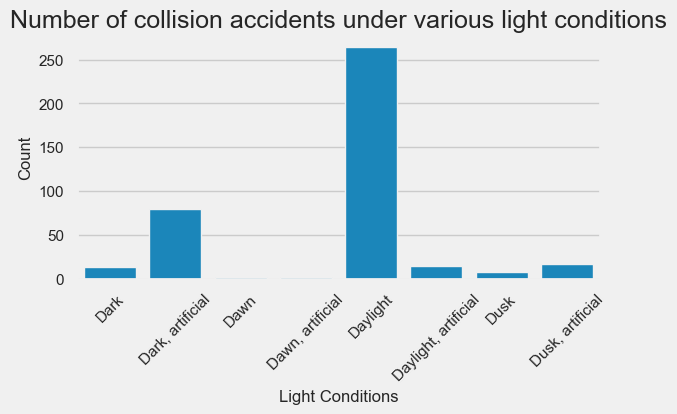

In [24]:
#plot the figure
plt.figure(figsize=(6, 3))
sns.barplot(data = light_cond, x = 'LIGHT', y= 'INDEX_')

plt.title('Number of collision accidents under various light conditions', fontsize=18)

plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
# count the number of accidents under each visibility conditions
vis_cond = collision_gdf.groupby('VISIBILITY').agg({'INDEX_': 'count'}).reset_index()
vis_cond.head()

,VISIBILITY,INDEX_
0,Clear,368
1,Drifting Snow,2
2,Rain,30


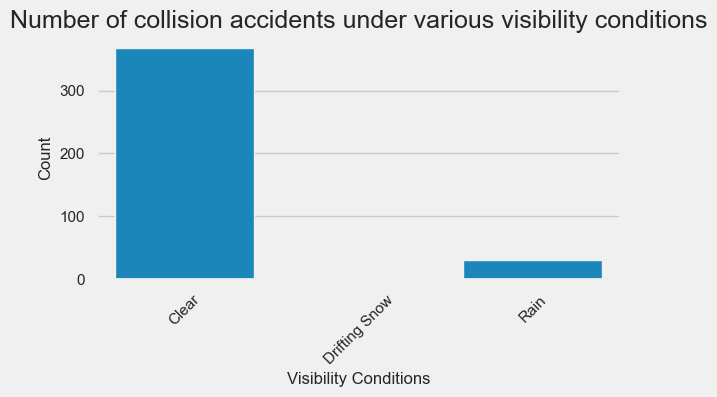

In [27]:
#plot the figure 
plt.figure(figsize=(6, 3))
sns.barplot(data = vis_cond, x = 'VISIBILITY', y= 'INDEX_')

plt.title('Number of collision accidents under various visibility conditions', fontsize=18)

plt.xlabel('Visibility Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Number of traffic lights and streets lights vs number of collisions within the neighborhoods

In [35]:
#count the number of accidents in each neighbourhood
collision_neighbor = collision_gdf.groupby('NEIGHBOU_1').agg({'INDEX_':'count'}).reset_index()
collision_neighbor.head()

,NEIGHBOU_1,INDEX_
0,Agincourt North (129),4
1,Alderwood (20),2
2,Annex (95),4
3,Banbury-Don Mills (42),2
4,Bay Street Corridor (76),14


In [29]:
topo_gdf['subtype'].unique()

array(['Miscellaneous Pole', 'Street Light and Traffic Signal Pole',
       'Traffic Signal Pole', 'Street Light Pole',
       'Pedestrian Light Pole', 'Circular Hydro Tower'], dtype=object)

In [61]:
traffic_street_light = topo_gdf.loc[topo_gdf['subtype'] == 'Street Light and Traffic Signal Pole']
traffic_street_light.head()

,objectid,subtype,subtypecod,elevation,d_owner,last_attri,last_geom_,geometry
7,154497,Street Light and Traffic Signal Pole,6004,134.81,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.36145 43.70272)
8,154498,Street Light and Traffic Signal Pole,6004,135.50,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.36166 43.70264)
9,154499,Street Light and Traffic Signal Pole,6004,126.30,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.35825 43.70198)
10,154500,Street Light and Traffic Signal Pole,6004,134.83,None,2005/01/01 00:00:00.000,2005/01/01 00:00:00.000,POINT (-79.36130 43.70259)
375,154865,Street Light and Traffic Signal Pole,6004,143.58,None,2014/01/01 00:00:00.000,2014/01/01 00:00:00.000,POINT (-79.39959 43.68246)


In [55]:
neighbourhoods.head()

,geometry,name,traffic signal and street lights,NEIGHBOU_1_x,INDEX__x,NEIGHBOU_1_y,INDEX__y
0,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",Wychwood (94),0,Wychwood (94),8,Wychwood (94),8
1,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",York University Heights (27),0,York University Heights (27),8,York University Heights (27),8
2,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",Yorkdale-Glen Park (31),0,Yorkdale-Glen Park (31),4,Yorkdale-Glen Park (31),4
3,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",Lawrence Park South (103),0,Lawrence Park South (103),2,Lawrence Park South (103),2
4,"POLYGON ((-79.37749 43.71309, -79.37762 43.713...",Leaside-Bennington (56),0,Leaside-Bennington (56),2,Leaside-Bennington (56),2


In [70]:
#count the number of signals and lights in each neighbourhoods.
neighbourhoods['traffic signal and street lights'] = neighbourhoods.apply(lambda row: traffic_street_light.within(row.geometry).sum(), axis = 1)

#merge neighbourhoods with collision_neighbor, which contains the number of collisions in each neighbourhoods.
neighbor_traffic_lights = pd.merge(neighbourhoods, collision_neighbor, left_on='name', right_on='NEIGHBOU_1')

neighbor_traffic_lights.head()

,geometry,name,traffic signal and street lights,NEIGHBOU_1,INDEX_
0,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",Wychwood (94),47,Wychwood (94),8
1,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",York University Heights (27),71,York University Heights (27),8
2,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",Yorkdale-Glen Park (31),57,Yorkdale-Glen Park (31),4
3,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",Lawrence Park South (103),58,Lawrence Park South (103),2
4,"POLYGON ((-79.37749 43.71309, -79.37762 43.713...",Leaside-Bennington (56),42,Leaside-Bennington (56),2


In [80]:
#count the number of lights alone in each neighbourhoods.
neighbourhoods['traffic signal'] = neighbourhoods.apply(lambda row: traffic_signal.within(row.geometry).sum(), axis = 1)

#merge neighbourhoods with collision_neighbor, which contains the number of collisions in each neighbourhoods.
neighbor_signal = pd.merge(neighbourhoods, collision_neighbor, left_on='name', right_on='NEIGHBOU_1')

neighbor_signal.head()

,geometry,name,traffic signal and street lights,street lights,traffic signal,NEIGHBOU_1,INDEX_
0,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",Wychwood (94),47,1218,59,Wychwood (94),8
1,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",York University Heights (27),71,4025,244,York University Heights (27),8
2,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",Yorkdale-Glen Park (31),57,2122,115,Yorkdale-Glen Park (31),4
3,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",Lawrence Park South (103),58,1493,47,Lawrence Park South (103),2
4,"POLYGON ((-79.37749 43.71309, -79.37762 43.713...",Leaside-Bennington (56),42,2034,65,Leaside-Bennington (56),2


In [75]:
#count the number of lights alone in each neighbourhoods.
neighbourhoods['street lights'] = neighbourhoods.apply(lambda row: topo_gdf_st_light_pole.within(row.geometry).sum(), axis = 1)

#merge neighbourhoods with collision_neighbor, which contains the number of collisions in each neighbourhoods.
neighbor_lights = pd.merge(neighbourhoods, collision_neighbor, left_on='name', right_on='NEIGHBOU_1')

neighbor_lights.head()

,geometry,name,traffic signal and street lights,street lights,NEIGHBOU_1,INDEX_
0,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",Wychwood (94),47,1218,Wychwood (94),8
1,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",York University Heights (27),71,4025,York University Heights (27),8
2,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",Yorkdale-Glen Park (31),57,2122,Yorkdale-Glen Park (31),4
3,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",Lawrence Park South (103),58,1493,Lawrence Park South (103),2
4,"POLYGON ((-79.37749 43.71309, -79.37762 43.713...",Leaside-Bennington (56),42,2034,Leaside-Bennington (56),2


In [91]:
neighbourhoods['traffic total'] = neighbourhoods['traffic signal and street lights']+ neighbourhoods['traffic signal']

traffic_total = pd.merge(neighbourhoods, collision_neighbor, left_on='name', right_on='NEIGHBOU_1')


Now that the number of lights/signals and the number of collision in each neighborhood is in the `neighbourhoods` dataframe, plot them together:

In [94]:
neighbor_traffic_lights.head()

,geometry,name,traffic signal and street lights,NEIGHBOU_1,INDEX_
0,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",Wychwood (94),47,Wychwood (94),8
1,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",York University Heights (27),71,York University Heights (27),8
2,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",Yorkdale-Glen Park (31),57,Yorkdale-Glen Park (31),4
3,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",Lawrence Park South (103),58,Lawrence Park South (103),2
4,"POLYGON ((-79.37749 43.71309, -79.37762 43.713...",Leaside-Bennington (56),42,Leaside-Bennington (56),2


<Figure size 600x600 with 0 Axes>

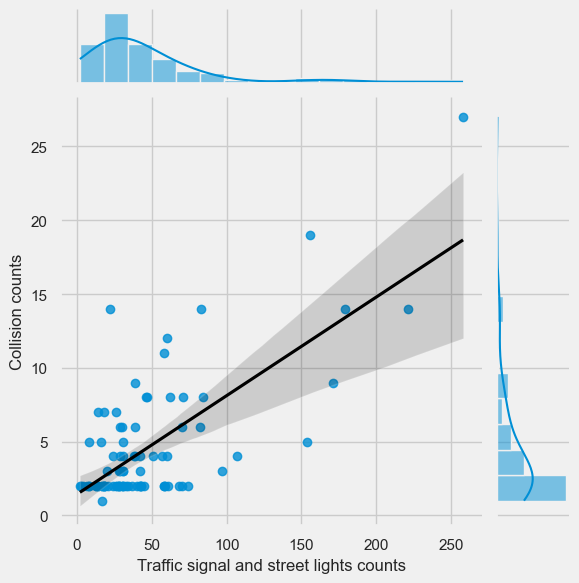

In [95]:
plt.figure(figsize=(6, 6))

sns.jointplot(data =neighbor_traffic_lights, x = 'traffic signal and street lights', y= 'INDEX_', kind="reg", joint_kws={'line_kws':{'color':'black'}}) 

#plt.title('Number of traffic signals and street lights vs. number of cyclist colisions', fontsize=15)

plt.xlabel('Traffic signal and street lights counts')
plt.ylabel('Collision counts')

plt.show()

There seems to be a linear relationship between number of lights and number of collisions in each neighbourhoods.

In [98]:
import numpy as np
linear_coefficient = np.corrcoef(neighbor_traffic_lights['traffic signal and street lights'], neighbor_traffic_lights['INDEX_'])
linear_coefficient

array([[1.        , 0.70888558],
       [0.70888558, 1.        ]])

Linear Correlation coefficient is 0.709.

In [ ]:
#0.343 for street lights
#0.436 for signals only